In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
df = pd.read_csv("traffic_fuzzy_generated.csv")  
print("✅ Dataset loaded! Shape:", df.shape)
print(df.head())

✅ Dataset loaded! Shape: (100, 4)
   vehicles  avg_wait_sec  is_peak  green_duration_sec
0       112            80        0                  54
1       189            18        0                  71
2       102            97        1                  67
3        24           138        1                  41
4       116           145        0                  62


In [8]:
veh = ctrl.Antecedent(np.arange(0, 120, 1), 'vehicles')
wait = ctrl.Antecedent(np.arange(0, 100, 1), 'avg_wait_sec')
peak = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'is_peak')
green = ctrl.Consequent(np.arange(0, 120, 1), 'green_duration_sec')

# Membership functions
veh['few'] = fuzz.trimf(veh.universe, [0, 0, 40])
veh['medium'] = fuzz.trimf(veh.universe, [20, 50, 80])
veh['many'] = fuzz.trimf(veh.universe, [60, 120, 120])

wait['short'] = fuzz.trimf(wait.universe, [0, 0, 30])
wait['medium'] = fuzz.trimf(wait.universe, [20, 50, 80])
wait['long'] = fuzz.trimf(wait.universe, [60, 100, 100])

peak['off'] = fuzz.trimf(peak.universe, [0, 0, 0.5])
peak['on'] = fuzz.trimf(peak.universe, [0.5, 1, 1])

green['short'] = fuzz.trimf(green.universe, [0, 0, 40])
green['normal'] = fuzz.trimf(green.universe, [30, 60, 90])
green['long'] = fuzz.trimf(green.universe, [70, 120, 120])


In [9]:
rule1 = ctrl.Rule(veh['many'] & wait['long'], green['long'])
rule2 = ctrl.Rule(veh['few'] & wait['short'], green['short'])
rule3 = ctrl.Rule(veh['medium'] & wait['medium'], green['normal'])
rule4 = ctrl.Rule(peak['on'] & wait['long'], green['long'])
rule5 = ctrl.Rule(peak['on'] & veh['many'], green['long'])
rule6 = ctrl.Rule(veh['few'] & peak['off'], green['short'])

In [10]:
green_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
green_sim = ctrl.ControlSystemSimulation(green_ctrl)


def fuzzy_infer(row):
    green_sim.input['vehicles'] = row['vehicles']
    green_sim.input['avg_wait_sec'] = row['avg_wait_sec']
    green_sim.input['is_peak'] = row['is_peak']
    try:
        green_sim.compute()
        return green_sim.output['green_duration_sec']
    except:
        return np.nan

df['fuzzy_pred'] = df.apply(fuzzy_infer, axis=1)


In [1]:
def categorize(x):
    if x < 40:
        return 'Short'
    elif x < 80:
        return 'Normal'
    else:
        return 'Long'

df['green_category'] = df['fuzzy_pred'].apply(categorize)
print(df[['vehicles','avg_wait_sec','is_peak','fuzzy_pred','green_category']].head())

   vehicles  avg_wait_sec  is_peak  fuzzy_pred green_category
0       112            80        0  100.036530           Long
1       189            18        0         NaN           Long
2       102            97        1  102.617955           Long
3        24           138        1  102.666244           Long
4       116           145        0  102.631313           Long


c:\Winson\venv\Lib\site-packages\skfuzzy\control\term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 600x400 with 0 Axes>

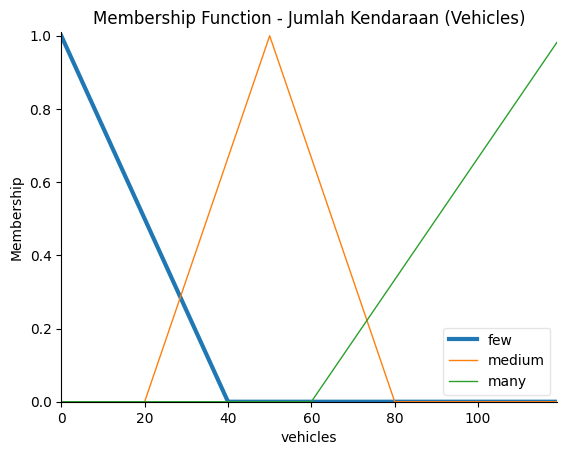

<Figure size 600x400 with 0 Axes>

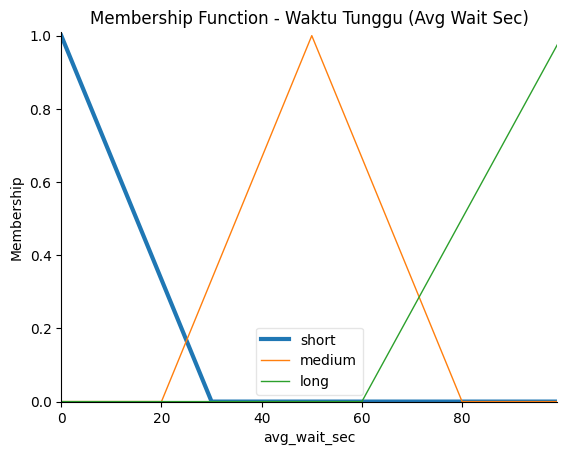

<Figure size 600x400 with 0 Axes>

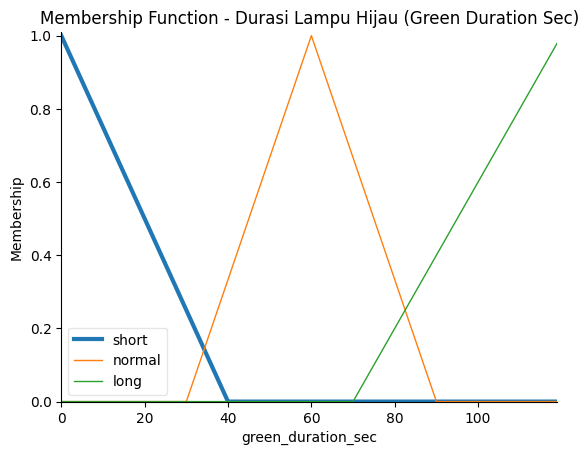

In [7]:
plt.figure(figsize=(6,4))
veh['few'].view()
plt.title("Membership Function - Jumlah Kendaraan (Vehicles)")

plt.figure(figsize=(6,4))
wait['short'].view()
plt.title("Membership Function - Waktu Tunggu (Avg Wait Sec)")

plt.figure(figsize=(6,4))
green['short'].view()
plt.title("Membership Function - Durasi Lampu Hijau (Green Duration Sec)")

plt.show()

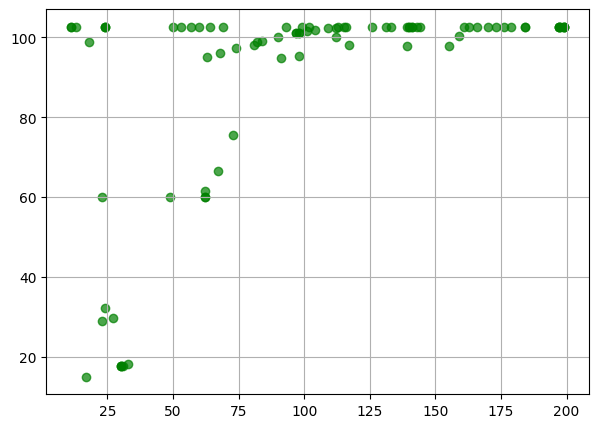

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df['vehicles'], df['fuzzy_pred'], alpha=0.7, color='green')
plt.title
plt.xlabel
plt.ylabel
plt.grid(True)
plt.show()